# Nombre de los Integrantes:

+ Kaline Andrea Rios Castro 1007768432 

+ Daniel Felipe Villa Rengifo 1005087556

In [25]:
# Correr si es necesario:
#!pip install pmdarima

In [26]:
# Modulos necesarios
import pandas as pd
import numpy as np # Para trabajar con vectores, matrices y funciones especiales
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, acf, pacf
from statsmodels.api import stats
import statsmodels.api as sm
from IPython.display import display_html, Math, display, Latex
from itertools import chain,cycle, repeat
from datetime import datetime
import warnings
from pandas.plotting import autocorrelation_plot
import pylab as py
import scipy.stats as ss
from pmdarima.arima import auto_arima
plt.style.use('seaborn-white')

In [27]:
def display_side_by_side(*args,titles=cycle([''])):
    '''
    Función para observar varios dataframe
    como slide by slide
    '''
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2 style="text-align: center;">{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

# Serie 1

In [28]:
# Lectura de la base de Datos:
df1 = pd.read_excel("datos_parcial2.xlsx", sheet_name="serie1", parse_dates=["fecha"])

In [29]:
# Encabezado y Cola con un respectivo resumen de variable Valor:
display_side_by_side(df1.head(5), df1.tail(5) ,df1.describe(), titles=['Encabezado','Cola','Summary'])

,fecha,valor
0,2021-01-01,0.06
1,2021-01-02,0.05
2,2021-01-03,0.05
3,2021-01-04,0.51
4,2021-01-05,2.03
,fecha,valor
226,2021-08-15,16.90
227,2021-08-16,17.35
228,2021-08-17,18.85
229,2021-08-18,21.40


Aqui podemos ver el encabezado de los datos y un `Summary` de la variable de valor, de la cual no tenemos información.
Se obviaron las unidades y por ende solo sacaremos conclusiones apartir de esto.

1. Notamos que los datos de esta 1er serie estan organizados en la cuestión de la variable `fecha`, por lo que solo falta analizar si estas fueron leidas de una manera correcta, es decir, todas cumplen el formato de _AAAA-MM-DD_; los datos en la variable de la fecha van del 2021 del 1ro de Enero al 2021 del 19 de agosto (esto omitiendo de que todas vayan día por día, sin saltarse alguno, por lo cual esto tambíen será verificado después).


2. Para el caso de la variable `valor` tenemos que los variables van desde $-13.83$ al $22.60$, esto demuestra un alto rango de variabilidad, además la media de `valor` es negativa $\mu = -1.039134$ por lo que veremos en un analisís descriptivo la distribución de los datos para tener una mejor idea de estos.

Text(0, 0.5, 'Frecuencia')

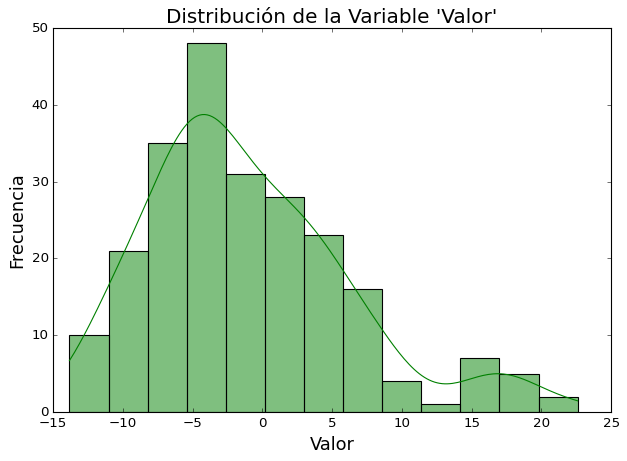

In [30]:
plt.figure(figsize=(9,6))
plt.style.use('classic')
sns.histplot(x= 'valor', data=df1, bins='auto', kde=True, color='green')
plt.title('Distribución de la Variable \'Valor\'', fontsize=18)
plt.xlabel('Valor', fontsize=16)
plt.ylabel('Frecuencia', fontsize=16)

Vemos como los datos tienen cola hacia la derecha por lo que la distribución de los datos no son centrados y estan acumulados desde los $-7$ hasta el $0$ por lo que ahora vemos porque $\mu$ es negativo, ya que los datos estan concentrados debajo del cero.

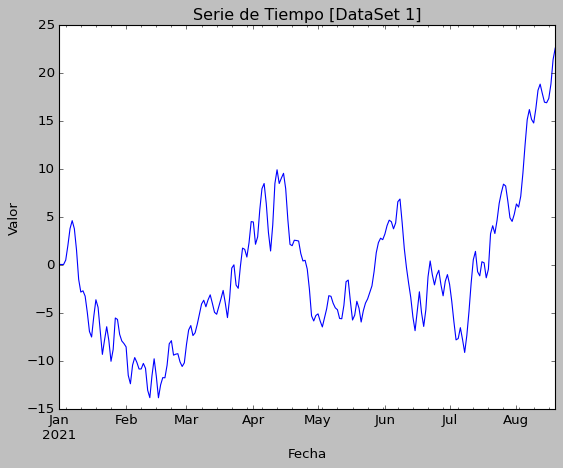

In [31]:
# Ahora graficaremos la Serie de tiempo para tener una mejor percepción:
ax = df1.plot('fecha', 'valor', legend=False, color="blue")
plt.style.use('ggplot')
ax.set_title('Serie de Tiempo [DataSet 1]')
ax.set_xlabel('Fecha')
ax.set_ylabel('Valor')
plt.show()

## Pregunta 1
Realice los gráficos ACF y PACF para tratar de identificar los órdenes $p$, $d$ y $q$ del modelo ARIMA($p$, $d$, $q$). Saque conclusiones argumentando cada una.

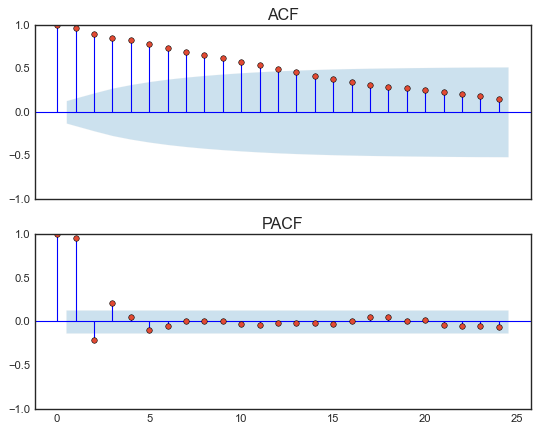

In [32]:
plt.style.use('seaborn-white')
fig, axes = plt.subplots(2, 1, sharex=True)
plot_acf(df1['valor'], ax=axes[0], title="ACF")
plot_pacf(df1['valor'], method='ywm',ax=axes[1], title="PACF")
plt.show()

Como podemos ver en el __ACF__ los valores decaen de forma lenta, esto revela algo que se ve en la serie anterior y es la tendencia, por lo que de primera parte tomaremos una diferencia $d = 1$, pero para afirmar esto, no es suficiente una prueba visual sino una confirmación estadística que confirme lo que se puede notar por medio de las graficas.

Tambíen notamos que los valores de la __PACF__ decaen rapido como un tipo de corte por lo que apriori suponemos un modelo AR, pero antes con el test de $Dick-Fuller$ confirmamos lo que estamos diciendo.

## Pregunta 2:

Aplique la prueba de Dickey-Fuller para ver si es necesario tomar diferencias (valor de $d$). Saque conclusiones argumentando cada una.

![](Dickey_Fuller.png)

In [33]:
Math("[p-valor = "+str(adfuller(df1['valor'])[1])+"]  > 0.05")

<IPython.core.display.Math object>

Podemos ver como nuestro $p-valor > \alpha$ (asignado), por lo que aceptamos la hipotesís $H_0$ y decimos que __la serie tiene tendencia por lo cual debemos diferenciar__.

## Pregunta 3:

Si $d\geq 1$ en el item (2), entonces realice nuevamente los gráficos ACF y PACF de la serie diferenciada de orden $d$, esto con el fin de identificar los ordenes $p$ y $q$. Saque conclusiones argumentando cada una.

Ahora vamos a tomar la diferencia (d = 1) para comprobrar si esta es suficiente para rechazar la hipotesís nula (NO tendencia)

In [49]:
# Aplico la diferencia de la variable valor:
dv = df1['valor'].diff()
dv = pd.DataFrame({'fecha':df1['fecha'],'valor':dv}) # Nuevo dataframe con la diferencia
dv.dropna(inplace=True) # quitar valor NA

Text(0, 0.5, 'diff(Valor)')

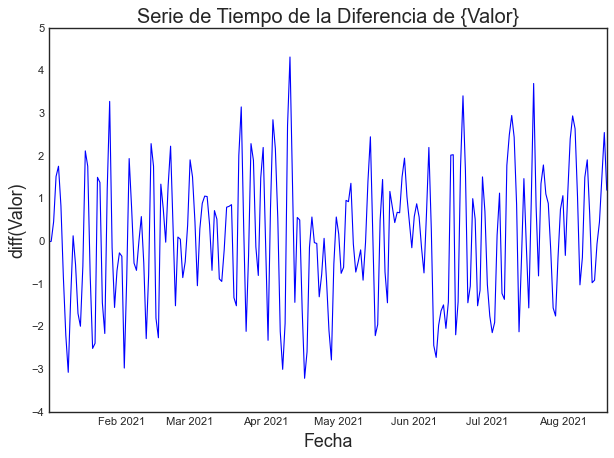

In [50]:
# Grafico de la Serie de Tiempo de la Diferencia de Valor:
plt.figure(figsize=(9,6))
plt.plot(dv['fecha'],dv['valor'], color="blue")
plt.title('Serie de Tiempo de la Diferencia de {Valor}', fontsize=18)
plt.xlabel('Fecha', fontsize=16)
plt.ylabel('diff(Valor)', fontsize=16)

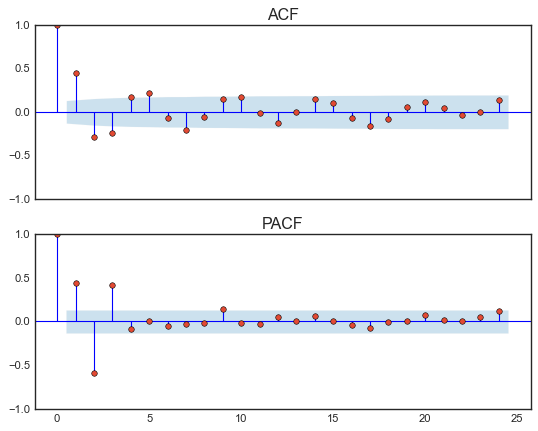

In [51]:
# Graficamos el ACF y el PACF de la nueva variable diff(valor):
plt.style.use('seaborn-white')
fig, axes = plt.subplots(2, 1, sharex=True)
plot_acf(dv['valor'], ax=axes[0], title="ACF")
plot_pacf(dv['valor'], method='ywm',ax=axes[1], title="PACF")
plt.show()

Aqui podemos ver una mejor con respecto al ACF & PACF anterior, es decir que visualmente podemos suponer estacionariedad,
vemos como el ACF con un decaimiento senoidal muy leve __(Cola)__, ahora para el PACF vemos una decaida desde el valor # 2, por lo que la ultima linea en caerse es el 3 __(Corte)__

In [52]:
# Ahora aplicamos la prueba de dickey-fuller para probar estadísticamente lo que se ve en el grafico:
Math("[p-valor = "+str(adfuller(dv['valor'])[1])+"]  < 0.05")

<IPython.core.display.Math object>

Nuestro $p-valor < \alpha$, esto nos da la capacidad de rechazar $H_0$ y aceptar que los datos ya no tienen tendencia _(visible con el ACF & PACF)_.

## Pregunta 4:
Aplique varios modelos (explicando el por qué aplica cada uno) y use un criterio de selección (AIC, BIC) para seleccionar el "mejor". Saque conclusiones argumentando cada una.


Analizando los dos graficos anteriores tenemos las siguientes hipotesis:

1. Un modelo ARIMA(3,1,0): dado que dijimos que nuestro ACF (Cola) % PACF (Corte) tomamos el valor de la ultima linea en salir de la banda de confianza (la más notable) es la numero p = 3, con una diferencia (como acabamos de ver) y q= 0 como primera opción.


2. modelo ARIMA(3,1,1): Si tomamos los graficos ACF (Cola) & PACF (Cola) decimos que sea un modelo ARMA(p=3,q=1) con una diferencia para evitar la tendencia y un q = 1 dado que el ACF sale en la linea 1.


3. Por utlimo un modelo ARIMA(4,1,0): dado de que si cambiamos los papeles ACF (Corte) & PACF (Cola, caida senoidal), un modelo con una sola diferencia, dado que en $d = 1$ dio estacionariedad, con un ACF que sale de la banda de confianza en la barra # 4. y q = 0 como primera opción.

In [53]:
warnings.filterwarnings('ignore')
df11 = df1.set_index("fecha")
# Creación de los modelos y Sacamos sus respectivos AIC & BIC
# para la selección del mejor modelo
orden = ['(3,1,0)', '(3,1,1)', '(4,1,0)']
AIC = {}
BIC = {}
for i in range(len(orden)):
    t = i +1
    exec("S1_m"+str(t)+" = ARIMA(df11, order ="+orden[i]+").fit()")
    exec("AIC[\'ARIMA"+orden[i]+"\']=S1_m"+str(t)+".aic")
    exec("BIC[\"ARIMA"+orden[i]+"\"]=S1_m"+str(t)+".bic")

In [54]:
# Buscar el min(AIC) and min(BIC):
for i in AIC.keys():
    if float(AIC[str(i)]) == float(min(AIC.values())):
            maic = str(i)

for i in BIC.keys():
    if float(BIC[str(i)]) == float(min(BIC.values())):
            mbic = str(i)

# Para verificar si min(AIC) & min(BIC) sean los mismos modelos:
if maic == mbic:
    display(Math("Minimo \ AIC \ \& \ BIC \ de \ los \ modelos \ Propuestos"))
    display(Math(str(maic)+":AIC = "+str(round(AIC[maic],4))+" \ \& \ BIC = "+str(round(BIC[mbic],4))))
else:
    display(Math("Minimo \ AIC \ \& \ BIC \ de \ los \ modelos \ Propuestos \ de \ la \ Serie-2"))
    display(Math("Diferentes \ Modelos:"))
    display(Math(str(maic)+":AIC = "+str(round(AIC[maic],4))))
    display(Math(str(mbic)+":BIC = "+str(round(BIC[mbic],4))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Nuestro modelo al final es $AR(3)$ aplicando una diferencia, esto era de esperarse ya que visualmente en el ACF & PACF era lo más obvio, es decir, nuestro modelo al final es:

In [40]:
# Resumen del modelo ARIMA(3,1,0)
S1_m1.summary(alpha=0.05)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  valor   No. Observations:                  231
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -324.862
Date:                Tue, 04 Oct 2022   AIC                            657.723
Time:                        13:13:47   BIC                            671.475
Sample:                    01-01-2021   HQIC                           663.270
                         - 08-19-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9507      0.059     16.213      0.000       0.836       1.066
ar.L2         -0.8858      0.065    -13.691      0.000      -1.013      -0.759
ar.L3          0.4167      0.060      6.920      0.000       0.299       0.535
sigma2         0.9800      0.103      9.481      0.000       0.777       1.183
===================================================================================
Ljung-Box (L1) (Q):                   0.33   Jarque-Bera (JB):                 1.59
Prob(Q):                              0.56   Prob(JB):                         0.45
Heteroskedasticity (H):               1.21   Skew:                             0.07
Prob(H) (two-sided):                  0.40   Kurtosis:                         2.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Modelo Estimado

Como podemos ver nuestros valores estimados son significativos de tal manera que los aceptamos
teniendo por ultimo el siguiente modelo:

$\hat{X_{t}} = 0.9507*\hat{X_{t-1}} - 0.8858*\hat{X_{t-2}}+0.4167*\hat{X_{t-3}}$

## Pregunta 5
Verifique si el "mejor" modelo seleccionado en el item (4) es estacionario e invertible (recuerde usar las funciones __abs__ y __np.roots__ aplicadas a los polinómios estimados por el modelo). Saque conclusiones argumentando cada una.

Obtención de las raíces de los polinomios AR (polinómio $\phi(B)$) y verificación que sus módulos sean mayores que 1 (estén por fuera del círculo unitario)

$\phi(B) = 1-0.9507B+0.8858B^{2}-0.4167B^3$

In [55]:
ro = abs(np.roots([-0.4167,0.8858,-0.9507,1]))

for i in range(len(ro)):
    t = i+1
    if ro[i] > 1:
        display(Math("Raiz \ "+str(t)+" = "+str(round(ro[i],4))+" \ > 1"))
    else:
        print("No tiene Raices unitarias ro["+str(i)+"]")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Podemos ver las tres Raices cumplen con la condición de ser mayores a uno, estan por fuera del circulo unitario; __Cumpliendo con la propiedad de Estacionariedad__.


Ahora para la invertibilidad tenemos que recordar que los procesos $AR(p)$ son siempre invertibles.

## Pregunta 6
Verifique si existe autocorrelación en los residuales del modelo seleccionado utilizando el gráfico ACF y complementando con la prueba de Ljung-Box (para los primeros 10 lags, es decir, h=10). Saque conclusiones argumentando cada una.

<Figure size 400x400 with 0 Axes>

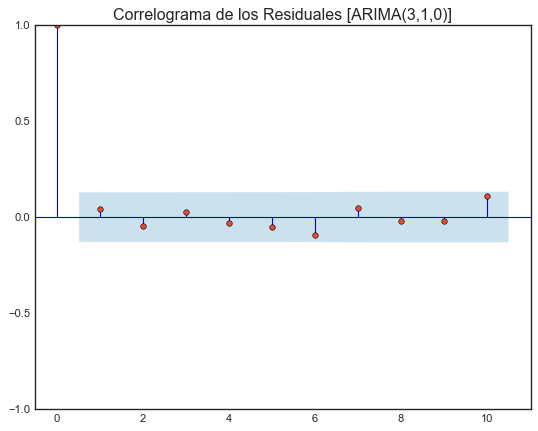

In [56]:
plt.figure(figsize=(5,5))
plot_acf(S1_m1.resid, lags=10,title="Correlograma de los Residuales [ARIMA(3,1,0)]")
plt.show()

In [158]:
# Prueba de Ljung-:
stats.acorr_ljungbox(S1_m1.resid, lags=10, return_df=True)

,lb_stat,lb_pvalue
1,0.339442,0.560152
2,0.911694,0.633911
3,1.057063,0.787448
4,1.302026,0.861032
5,2.016187,0.846901
6,4.308090,0.635060
7,4.822493,0.681615
8,4.949329,0.762978
9,5.082445,0.827063
10,7.828782,0.645557


Planteamos la prueba de hipotesís:

H_0: Los residuales no estan correlacionados.

H_1: Los residuales estan correlacionado.
![](ljung_Box.png)

en el data.frame vemos:

+ `lb_stat`: Estadístico de Prueba

+ `lb_value`: Valor P

__lb_pvalue__ $> \alpha$

Tomando un error tipo I del 5% decimos que aceptamos $H_0$ y por ende nuestros residuales no estan autocorrelacionados, esto se ve en el correlograma dado de que las barras estan dentro de la banda de confianza y demostrando una NO relación entre ellas.

## Pregunta 7

Verifique si hay normalidad en los residuales del modelo. Saque conclusiones argumentando cada una.

Con el qq-plot normal ayuda a este punto, junto con el test de normalidad de __Jarque-Bera__

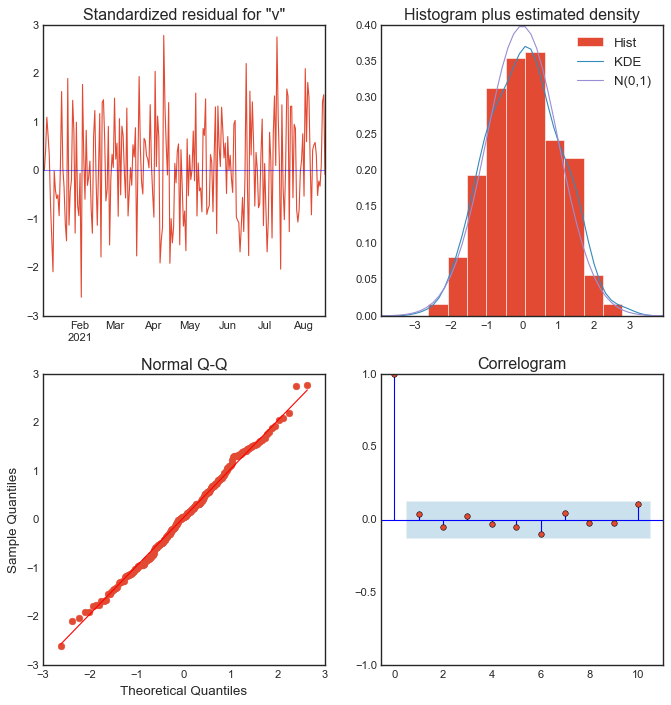

In [57]:
# Utilizaremos el diagnostico predeterminado para observar no solo el qqplot
#sino tambien el histograma con los density-plot para el ajuste visual de una normal.

S1_m1.plot_diagnostics(figsize=(10, 10))
plt.show()

Aqui podemos ver como se ajusta los datos en el qqplot, es decir que se comportan similares a los cuantiles de una normal, además de observar que los residuales tienen variabilidad controlada o constante con media 0.

Por ultimo observar el ajuste del histograma frente a la distribución normal N(0,1)
Por lo que veremos con el test de Jarque-Bera si lo visual se cumple númericamente.

In [58]:
# Test de Jarque-Bera:
jb = ss.jarque_bera(S1_m1.resid)
display(Math("Test \ Jarque-Bera"))
Math("Valor \ P = "+ str(round(jb.pvalue,3)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Como podemos ver el valor P es superior a nuestro $\alpha$ por lo que decimos que __nuestros residuales se distribuyen normal__ con una confianza del 95%

## Pregunta 8:

Si todo lo anterior se cumple entonces puede realizar pronósticos con el "mejor" modelo ajustado para los 5 valores futuros. Saque conclusiones argumentando cada una.

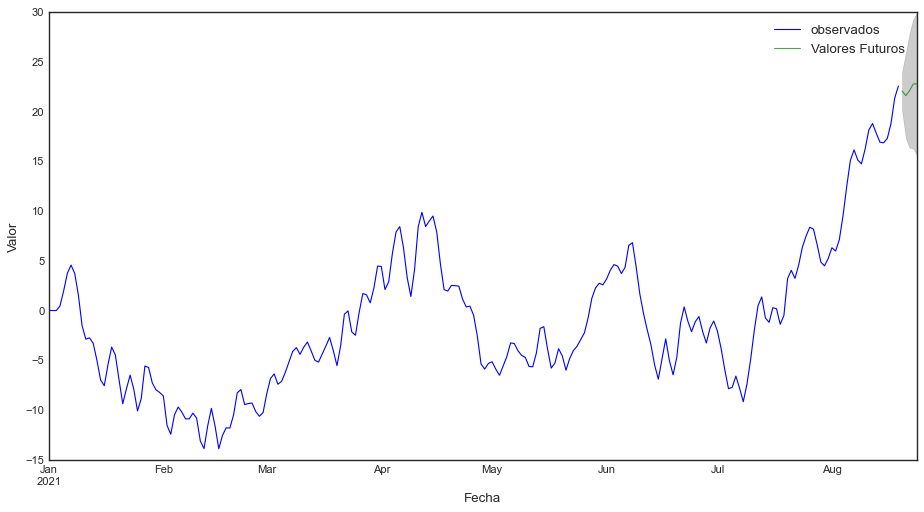

In [59]:
pred = S1_m1.get_forecast(5,dynamic=False)
pred_ci = pred.conf_int(alpha=0.05)

ax = df11['valor'].plot(label='observados', color="blue")
pred.predicted_mean.plot(ax=ax, label='Valores Futuros', alpha=.7, figsize=(14, 7), color="green")
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Fecha')
ax.set_ylabel('Valor')
plt.legend()
plt.show()

Como podemos ver la sombra representa el intervalo de confianza del 95%, con su respectivo valor futuro, además de mostrarnos los valores observados de color azul.

Podemos notar como el intervalo se expande a medida de se predicen valores futuros más lejanos al ultimo valor observado, esto tomando `dynamic=False`.

# Serie 2 y 3

In [60]:
# Lectura de las bases de datos:
# Lectura de la base de Datos:
#for i in range(2,4):
#    exec("df"+str(i)+" = pd.read_excel(\"/content/datos_parcial2.xlsx\", sheet_name=\"serie"+str(i)+"\", parse_dates=[\"fecha\"])")

In [76]:
df2 = pd.read_excel("datos_parcial2.xlsx", sheet_name="serie2", parse_dates=["fecha"])
df3 = pd.read_excel("datos_parcial2.xlsx", sheet_name="serie3", parse_dates=["fecha"])

In [77]:
# Organización de la base de datos 3, con su respectivo reordenamiento de los indices
df3 = df3.sort_values('fecha').sort_values('fecha')
df3 = df3.set_index('fecha')

<font size="5">Base de Datos N°2</font>

In [78]:
display_side_by_side(df2.head(5), df2.tail(5) ,df2.describe(), titles=['Encabezado','Cola','Summary'])

,fecha,value
0,2020-01-01,-0.89
1,2020-01-02,-0.99
2,2020-01-03,-1.62
3,2020-01-04,-1.13
4,2020-01-05,-0.91
,fecha,value
516,2021-05-31,-92.78
517,2021-06-01,-91.90
518,2021-06-02,-92.96
519,2021-06-03,-92.96


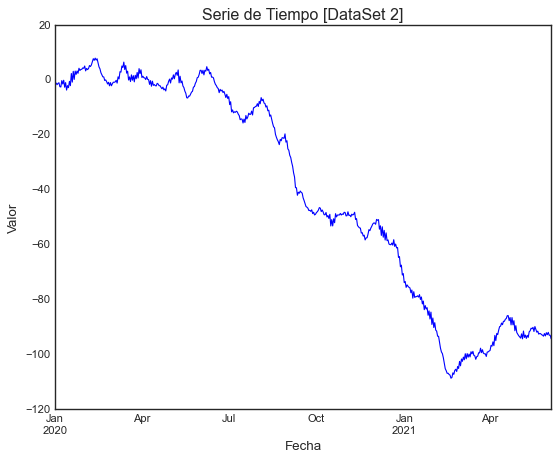

In [79]:
# Observar los valores de la serie de tiempo:
ax = df2.plot('fecha', 'value', legend=False, color="blue")
ax.set_title('Serie de Tiempo [DataSet 2]')
ax.set_xlabel('Fecha')
ax.set_ylabel('Valor')
plt.show()

Aqui podemos ver el encabezado de los datos y un `Summary` de la variable de value, de la cual no tenemos información.
Se obviaron las unidades y por ende solo sacaremos conclusiones apartir de esto.

1. Notamos que los datos de esta 2da serie estan organizados en la cuestión de la variable `date`. los datos en la variable de la fecha van del 2020 del 1ro de Enero al 2021 del 04 de junio (esto omitiendo de que todas vayan día por día, sin saltarse alguno).

2. Para el caso de la variable `value` tenemos que los variables van desde $-108.63$ al $8.07$, esto demuestra un alto rango de variabilidad, además la media de `valor` es negativa $\mu = -40.839808$.

<font size="5">Base de Datos N°3</font>

In [80]:
display_side_by_side(df3.head(5), df3.tail(5) ,df3.describe(), titles=['Encabezado','Cola','Summary'])

,registro
fecha,
2019-01-01,1.37
2019-01-02,3.65
2019-01-03,5.86
2019-01-04,10.57
2019-01-05,14.17
,registro
fecha,
2021-04-12,-59.77
2021-04-13,-56.04


Aqui podemos ver el encabezado de los datos y un `Summary` de la variable de registro, de la cual no tenemos información.
Se obviaron las unidades y por ende solo sacaremos conclusiones apartir de esto.

1. Notamos que los datos de esta 3ra serie estan organizados en la cuestión de la variable `fecha`. los datos en la variable de la fecha van del 2019 del 1ro de Enero al 2021 del 16 de abril (esto omitiendo de que todas vayan día por día, sin saltarse alguno).

2. Para el caso de la variable `registro` tenemos que los variables van desde $-102.05$ al $61.77$, esto demuestra un alto rango de variabilidad, además la media de `valor` es negativa $\mu = -24.981147$.

## Pregunta 1
Realice los gráficos ACF y PACF para tratar de identificar los órdenes $p$, $d$ y $q$ del modelo ARIMA($p$, $d$, $q$). Saque conclusiones argumentando cada una.

<font size="5">Serie de Tiempo N°2</font>

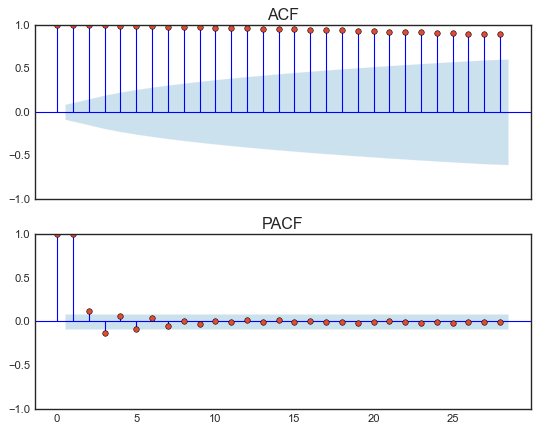

In [81]:
plt.style.use('seaborn-white')
fig, axes = plt.subplots(2, 1, sharex=True)
plot_acf(df2['value'], ax=axes[0], title="ACF")
plot_pacf(df2['value'], method='ywm',ax=axes[1], title="PACF")
plt.show()

Se puede Notar una tendencia muy marcada al poco decaimiento del ACF, por lo que de manera obligatoria tocara aplicar una diferencia $d \geq 1$

Por lo cual veremos la serie de tiempo, aplicando una diferencia

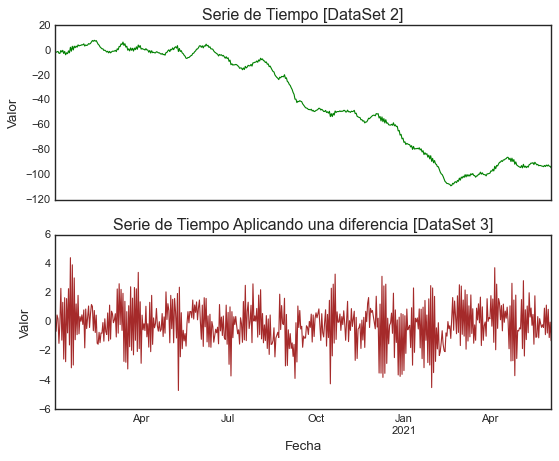

In [82]:
# Observar los valores de la serie de tiempo:
fig, axes = plt.subplots(2, 1, sharex=True)
ax = df2.plot('fecha','value',legend=False, color="green", ax=axes[0])
ax.set_title('Serie de Tiempo [DataSet 2]')
ax.set_xlabel('Fecha')
ax.set_ylabel('Valor')

# Aplicar una diferencia a los datos:
dv2 = df2.set_index('fecha').diff().dropna()
# Observar los valores de la serie de tiempo:
ax = dv2['value'].plot(legend=False, color="brown", ax=axes[1])
ax.set_title('Serie de Tiempo Aplicando una diferencia [DataSet 3]')
ax.set_xlabel('Fecha')
ax.set_ylabel('Valor')
plt.show()
plt.show()

<font size="5">Serie de Tiempo N°3</font>

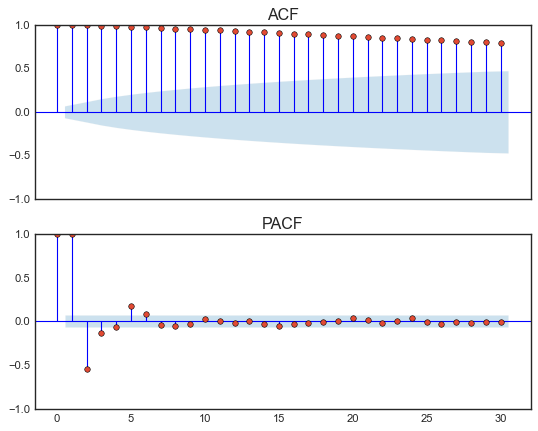

In [83]:
plt.style.use('seaborn-white')
fig, axes = plt.subplots(2, 1, sharex=True)
plot_acf(df3['registro'], ax=axes[0], title="ACF")
plot_pacf(df3['registro'], method='ywm',ax=axes[1], title="PACF")
plt.show()

In [75]:
df3

,fecha
registro,
-102.05,2021-01-17
-101.91,2021-01-16
-101.47,2021-01-18
-101.41,2021-01-15
-100.51,2021-01-14
...,...
56.05,2019-09-11
58.84,2019-09-07
60.28,2019-09-10


Para el otro caso tenemos la serie tambíen presenta una tendencia, por lo cual tambien se le aplicara una diferencia a los datos.

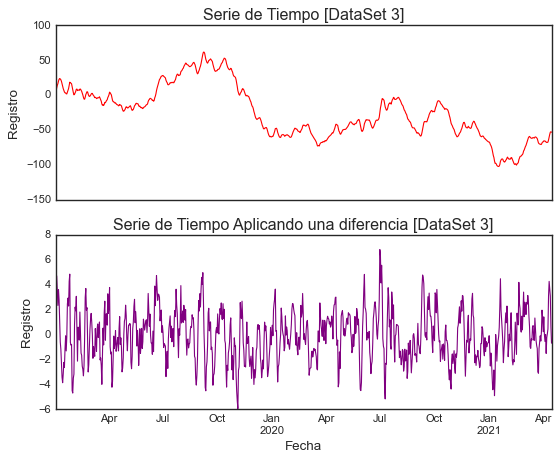

In [84]:
fig, axes = plt.subplots(2, 1, sharex=True)
# Observar los valores de la serie de tiempo:
ax = df3['registro'].plot(legend=False, color="red", ax=axes[0])
ax.set_title('Serie de Tiempo [DataSet 3]')
ax.set_xlabel('Fecha')
ax.set_ylabel('Registro')

# Aplicar una diferencia a los datos:
dv3 = df3.diff().dropna()

# Observar los valores de la serie de tiempo:
ax = dv3['registro'].plot(legend=False, color="purple", ax=axes[1])
ax.set_title('Serie de Tiempo Aplicando una diferencia [DataSet 3]')
ax.set_xlabel('Fecha')
ax.set_ylabel('Registro')
plt.show()

### Respuesta para la Series 2 & 3:

__Grafico con tendencia__

Aqui podemos observar que los datos tienen decaimientos, pero con algún tipo de tendencia, por lo que aplicando una diferencia tal vez veremos algo nuevo.

__Grafico sin tendencia__

Ahora podemos observar con mayor estetica una serie de tiempo con variablidad y media constante.

## Pregunta 2 & 3:

+ Aplique la prueba de Dickey-Fuller para ver si es necesario tomar diferencias (valor de $d$). Saque conclusiones argumentando cada una.


+ Si $d\geq 1$ en el item (2), entonces realice nuevamente los gráficos ACF y PACF de la serie diferenciada de orden $d$, esto con el fin de identificar los ordenes $p$ y $q$. Saque conclusiones argumentando cada una.

<font size="5" color="red">Test de Dickey-Fuller</font>

<font size="5">Serie de Tiempo N°2 </font>

In [85]:
Math("[p-valor = "+str(adfuller(df2['value'])[1])+"]  > 0.05")

<IPython.core.display.Math object>

<font size="5">Serie de Tiempo N°3 </font>

In [86]:
Math("[p-valor = "+str(adfuller(df3['registro'])[1])+"]  > 0.05")

<IPython.core.display.Math object>

Como podemos ver nuestros p-valores nos indica que al menos debemos tomar una diferencia (para las dos series) dado la aceptación de la hipotesís nula de la prueba de Dickey-Fuller.

In [ ]:
# Tomando diferencias de las series
display_side_by_side(dv2.head(5), dv3.head(5), titles=['Diferencia de la Serie 2', 'Diferencia de la Serie 3'])

<font size="5" color="red">ACF & PACF de las Diferencias</font>

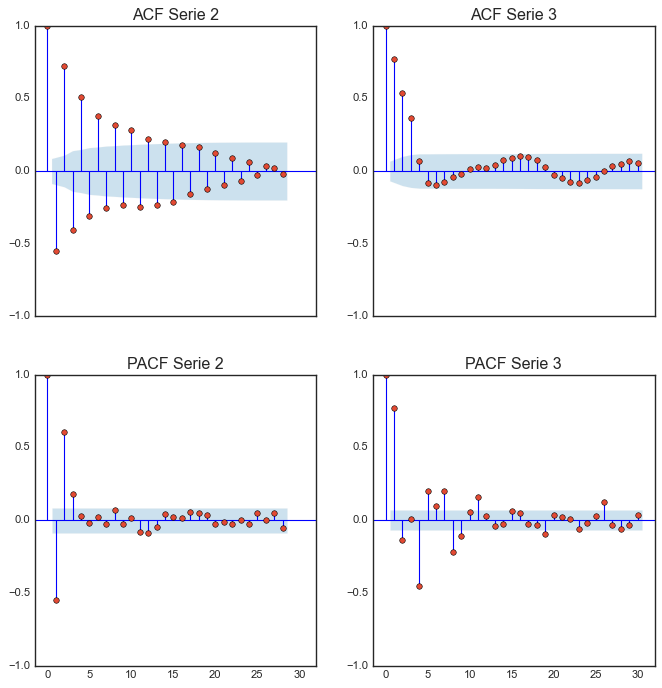

In [89]:
plt.style.use('seaborn-white')
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(10,10))
plot_acf(dv2['value'], ax=axes[0,0], title="ACF Serie 2")
plot_pacf(dv2['value'], method='ywm',ax=axes[1,0], title="PACF Serie 2")
plot_acf(dv3['registro'], ax=axes[0,1], title="ACF Serie 3")
plot_pacf(dv3['registro'], method='ywm',ax=axes[1,1], title="PACF Serie 3")
plt.show()

Como podemos ver se presenta un modelo de la siguiente manera:

+ __Serie 2:__

    Modelo AR(p)
    - ACF (Cola): Decaimiento senoidal
    - PACF (Corte): la ultima barra en salirse (omitiendo la primera) es la N°3


+ __Serie 3:__

    Modelo ARMA(p,q)
    - ACF (Cola): Decaimiento senoidal, la ultima barra en salirse (omit 1ra) 3 ó la 5.
    - PACF (Cola): Decaimiento senoidal, la ultima barra en salirse (omit 1ra) 1,4,5,7,8,9,11,26.



## Pregunta 4:
Aplique varios modelos (explicando el por qué aplica cada uno) y use un criterio de selección (AIC, BIC) para seleccionar el "mejor". Saque conclusiones argumentando cada una.

Como vimos aplicaremos los modelo de tal manera que seleccionemos con el AIC & BIC los mejores, por lo cual justificaremos lo anterior, __por medio de las barras que salen de las bandas de confianza__.

Aplicaremos los modelos:

__Serie 2:__

Modelos AR(p) desde $p = 3,2,1$ de tal manera que escojamos por simplicidad el que mejor ajuste y menor $p$ tenga dado de que lo simple siempre será mejor.

Además de notar en el ACF (Cola) & PACF (Corte), no buscaremos lo contrario.

Tambíen (solo para este modelo) trataremos de aplicar un intercepto (media diferente a cero) dado de que puede ser que el AIC sea menor


__Serie 3:__

Modelo ARMA(p,q), esto se debe a que ACF (Cola) & PACF (Cola), entonces buscaremos entre tantos modelos (demasiados para las demás series) el que mejor ajuste y este sin intercepto dado que el proceso se haría más largo por lo cual tendremos mejor unos modelos ajustados y buscar el menor AIC & BIC.



In [90]:
# Serie 2:
ar = [3,2,4,1]

display(Latex("-----------Serie N°2-----------"))
# Observar el tipo de modelos a crear
for i in range(len(ar)):
    display(Latex("ARMA(p = "+str(ar[i])+", d = 1, q = 0)\n"))

    
display(Latex("-----------Serie N°3-----------"))

# Serie 3:
ar = [3,5]
ma = [1,4,5,7,8,9,11,26]

# Observar el tipo de modelos a crear
for i in range(len(ar)):
    for j in range(len(ma)):
        display(Latex("ARMA(p = "+str(ar[i])+", d = 1, q = "+str(ma[j])+")\n"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [92]:
# Creación de los modelos:
warnings.filterwarnings('ignore')

####### Serie 2 #######
"Se ajustaron 4 modelos"
df22 = df2.set_index('fecha')
ar = [3,2,4,1]

AIC2 = {}
BIC2 = {}

for i in range(len(ar)):
    t = i +1
    exec("S2_m"+str(t)+" = ARIMA(df22, order = ("+str(ar[i])+", 1, 0)).fit()")
    exec("AIC2[\'ARIMA("+str(ar[i])+", 1, 0)\']=S2_m"+str(t)+".aic")
    exec("BIC2[\"ARIMA("+str(ar[i])+", 1, 0)\"]=S2_m"+str(t)+".bic")

####### Serie 3 #######
"Se ajustaron 14 modelos"
ar = [3,5]
ma = [1,2,4,5,7,8,9]

AIC3 = {}
BIC3 = {}

for i in range(len(ar)):
    t1 = i +1
    for j in range(len(ma)):
        t2 = j +1
        exec("S3_m"+str(t1)+str(t2)+" = ARIMA(df3, order = ("+str(ar[i])+", 1, "+str(ma[j])+")).fit()")
        exec("AIC3[\'ARIMA("+str(ar[i])+", 1, "+str(ma[j])+")\']=S3_m"+str(t1)+str(t2)+".aic")
        exec("BIC3[\'ARIMA("+str(ar[i])+", 1, "+str(ma[j])+")\']=S3_m"+str(t1)+str(t2)+".bic")

In [93]:
# Buscar el min(AIC) and min(BIC):

####### Serie 2 #######
for i in AIC2.keys():
    if float(AIC2[str(i)]) == float(min(AIC2.values())):
            maic2 = str(i)

for i in BIC2.keys():
    if float(BIC2[str(i)]) == float(min(BIC2.values())):
            mbic2 = str(i)


if maic2 == mbic2:
    display(Math("Minimo \ AIC \ \& \ BIC \ de \ los \ modelos \ Propuestos \ de \ la \ Serie \ N°2"))
    display(Math(str(maic2)+":AIC = "+str(round(AIC2[maic2],4))+" \ \& \ BIC = "+str(round(BIC2[mbic2],4))))
else:
    display(Math("Minimo \ AIC \ \& \ BIC \ de \ los \ modelos \ Propuestos \ de \ la \ Serie-2"))
    display(Math("Diferentes \ Modelos:"))
    display(Math(str(maic2)+":AIC = "+str(AIC2[maic2])))
    display(Math(str(mbic2)+":BIC = "+str(BIC2[mbic2])))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Queremos probar si con el intercepto será un mejor modelo, tomando como criterio el AIC & BIC (esto para la serie N°2).

Como podemos ver, nuestro "mejor" modelo con el AIC (más que todo) será el ARMA(1,0) aplicando una diferencia (esto debidao a la tendencia)
pero esto va en desacuerdo con el hecho de que el PACF muestra que la ultima barra (no necesariamente un criterio determinante) es el modelo ARMA(3,0) por lo cual, para buscar una comparación directa lo haremos con el intercepto de los modelos anteriores (tal cual solo aplicando `intercept`).

En python para aplicar un intercepto, se le aplica por medio de `trend`, tiene otras opciones pero cuando esta es igual a "t", decimos que la serie en cuestión tiene una tendencia lineal en el tiempo.

In [94]:
# Aplicamos 
S2_m5 = ARIMA(df22,order=(3,1,0), trend='t').fit()
# Ahora comparamos el AIC & BIC con los anteriores valores:

## Agregando los valores al diccionario:

AIC2['ARIMA(3,1,0)[Intercept]'] = S2_m5.aic 
BIC2['ARIMA(3,1,0)[Intercept]'] = S2_m5.bic

for i in AIC2.keys():
    if float(AIC2[str(i)]) == float(min(AIC2.values())):
            maic2 = str(i)

for i in BIC2.keys():
    if float(BIC2[str(i)]) == float(min(BIC2.values())):
            mbic2 = str(i)


if maic2 == mbic2:
    display(Math("Minimo \ AIC \ \& \ BIC \ de \ los \ modelos \ Propuestos \ de \ la \ Serie \ N°2"))
    display(Math(str(maic2)+":AIC = "+str(round(AIC2[maic2],4))+" \ \& \ BIC = "+str(round(BIC2[mbic2],4))))
else:
    display(Math("Minimo \ AIC \ \& \ BIC \ de \ los \ modelos \ Propuestos \ de \ la \ Serie-2"))
    display(Math("Diferentes \ Modelos:"))
    display(Math(str(maic2)+":AIC = "+str(round(AIC2[maic2],4))))
    display(Math(str(mbic2)+":BIC = "+str(round(BIC2[mbic2],4))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Ahora vemos como difieren los AIC con el BIC, diferentes modelos, por ende nos inclinamos por el BIC, dado de que este considera el tamaño de la muestra, es decir nuestro modelo final es:

__ARIMA(3,1,0)__

Con esto compramos que no necesariamente un intercepto hace la diferencia entre un modelo y otro, porque el AIC del ARIMA(3,1,0)[Intercept] y el de ARIMA(3,1,0) sean tan diferentes, solo difieren como en 2 puntos

Pero esto no quiere decir que el modelo sea significativo por lo cual los compararemos:

In [95]:
print(S2_m1.summary(),"\n \n", S2_m5.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  521
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -730.725
Date:                Tue, 04 Oct 2022   AIC                           1469.450
Time:                        13:20:51   BIC                           1486.466
Sample:                    01-01-2020   HQIC                          1476.116
                         - 06-04-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3155      0.049     -6.463      0.000      -0.411      -0.220
ar.L2          0.6594      0.035     18.585      0.000       0.590       0.729
ar.L3          0.1889      0.047      4.058      0.0

Como vemos que los dos son significativos, tomamos otros criterios de fuerza como el AIC & BIC.

In [96]:
# Buscar el min(AIC) and min(BIC):

####### Serie 3 #######
for i in AIC3.keys():
    if float(AIC3[str(i)]) == float(min(AIC3.values())):
            maic3 = str(i)

for i in BIC3.keys():
    if float(BIC3[str(i)]) == float(min(BIC3.values())):
            mbic3 = str(i)
            
if maic3 == mbic3:
    display(Math("Minimo \ AIC \ \& \ BIC \ de \ los \ modelos \ Propuestos \ de \ la \ Serie \ N°3"))
    display(Math(str(maic3)+":AIC = "+str(round(AIC3[maic3],4))+" \ \& \ BIC = "+str(round(BIC3[mbic3],4))))
else:
    display(Math("Minimo \ AIC \ \& \ BIC \ de \ los \ modelos \ Propuestos \ de \ la \ Serie-3"))
    display(Math("Diferentes \ Modelos:"))
    display(Math(str(maic3)+":AIC = "+str(round(AIC3[maic3],4))))
    display(Math(str(mbic3)+":BIC = "+str(round(BIC3[mbic3],4))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Para este caso analizaremos si este modelo final, es el que merece al final dar las predicciones, ya que consideramos que tomando otros criterios será mejor otros modelos.

Además tenemos una discrepancia, diferentes modelos (uno para el menor AIC y otro para el menor BIC).

Por lo que propondremos mejores modelos.

Veamos el modelo __ARIMA(5,1,1)__:

dado de que analizandolo vemos como es significativo a comparación de los demás.

Como podemos ver en los valores resaltados, no son significativos los valores, apesar de ser los valores AIC & BIC menores

![](S3_m13_summary.png)

Lo mismos Sucede para el modelo # 2, con el menor AIC:

![](S3_m16_summary.png)

Por lo que buscando cual sea el modelo con menor AIC & BIC, con parametros estimados significativos encontramos que es el modelo -> __ARIMA(5,1,1)__.

In [97]:
# Veamos el modelo resumido:
print(S3_m21.summary())

                               SARIMAX Results                                
Dep. Variable:               registro   No. Observations:                  837
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -1260.471
Date:                Tue, 04 Oct 2022   AIC                           2534.942
Time:                        13:21:01   BIC                           2568.042
Sample:                    01-01-2019   HQIC                          2547.631
                         - 04-16-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2588      0.089      2.913      0.004       0.085       0.433
ar.L2          0.3376      0.077      4.411      0.000       0.188       0.488
ar.L3          0.2991      0.039      7.681      0.0

Aqui tambíen observamos que los parametros de este modelo ARIMA(3,1,0) cumple siendo significativo en los parametros estimados.

## Pregunta 5

Verifique si el "mejor" modelo seleccionado en el item (4) es estacionario e invertible (recuerde usar las funciones __abs__ y __np.roots__ aplicadas a los polinómios estimados por el modelo). Saque conclusiones argumentando cada una.

Tenemos que el modelo estimado es:

+ <font size="3">Serie de Tiempo N°2</font>

    $\hat{X_t} = -0.3155*\hat{X_{t-1}}+0.6594*\hat{X_{t-2}} + 0.1889*\hat{X_{t-3}}$


+ <font size="3">Serie de Tiempo N°3</font>

    $\hat{X_t} = 0.2588*\hat{X_{t-1}}+0.3376*\hat{X_{t-2}} + 0.2991*\hat{X_{t-3}} - 0.3090*\hat{X_{t-4}} - 0.1704*\hat{X_{t-5}} + 0.7241*\hat{W_{t-1}}$

Con lo anterior en mente Sacamos los respectivos polinomios de cada uno


+ <font size="3">Serie de Tiempo N°2</font>

    $\phi(B) = 1 + 0.3155*B - 0.6594*B^2 - 0.1889*B^3$


+ <font size="3">Serie de Tiempo N°3</font>

    $\phi(B) = 1 - 0.2588*B - 0.3376*B^2 - 0.2991*B^3 + 0.3090*B^4 + 0.1704*B^5$
    
    $\theta(B) = 0 + 0.7241*B$

In [98]:
# Ahora sacamos las raices para verificar (Estacionariedad e Invertibilidad)

####### Serie 2 #######
ro2 = abs(np.roots([-0.1889,-0.6594,0.3155,1]))

display(Math("---Serie \ N°2---"))
for i in range(len(ro2)):
    t = i+1
    if ro2[i] > 1:
        display(Math("Raiz \ "+str(t)+" = "+str(round(ro2[i],4))+" \ > 1"))
    else:
        print("No tiene Raices unitarias ro["+str(i)+"] = "+str(round(ro2[i],4)))
        
        
####### Serie 3 #######
ro31 = abs(np.roots([0.1704,0.3090,-0.2991,-0.3376,-0.2588,1]))
ro32 = abs(np.roots([0.7241,1]))


display(Math("---Serie \ N°3---"))
display(Math("-AR(p = 5)-"))
for i in range(len(ro31)):
    t = i+1
    if ro31[i] > 1:
        display(Math("Raiz \ "+str(t)+" = "+str(round(ro31[i],4))+" \ > 1"))
    else:
        print("No tiene Raices unitarias ro["+str(i)+"] ="+str(round(ro31[i],4)))

display(Math("-MA(q = 1)-"))
for i in range(len(ro32)):
    t = i+1
    if ro32[i] > 1:
        display(Math("Raiz \ "+str(t)+" = "+str(round(ro32[i],4))+" \ > 1"))
    else:
        print("No tiene Raices unitarias ro["+str(i)+"] = "+str(round(ro32[i],4)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Como podemos ver  Nuestros dos modelos para sus respectivas series, estan Fuera del circulo unitario así que:

+ __Serie 2:__ Se prueba Estacionariedad, pero no invertibilidad, dado de que siempre un AR(p) lo es.


+ __Serie 3:__ Se prueba Esacionariedad con AR(p) e Invertibilida con MA(q) por lo que estos criterios estan cumplidos, decimos que el modelo no solo es significativo, sino cumple con las condiciones antes dichas.

## Pregunta 6 & 7:

+ Verifique si existe autocorrelación en los residuales del modelo seleccionado utilizando el gráfico ACF y complementando con la prueba de Ljung-Box (para los primeros 10 lags, es decir, h=10). Saque conclusiones argumentando cada una.



+ Verifique si hay normalidad en los residuales del modelo. Saque conclusiones argumentando cada una.

Para la verificación de estos supuestos, utilizamos los diagnosticos de las series.

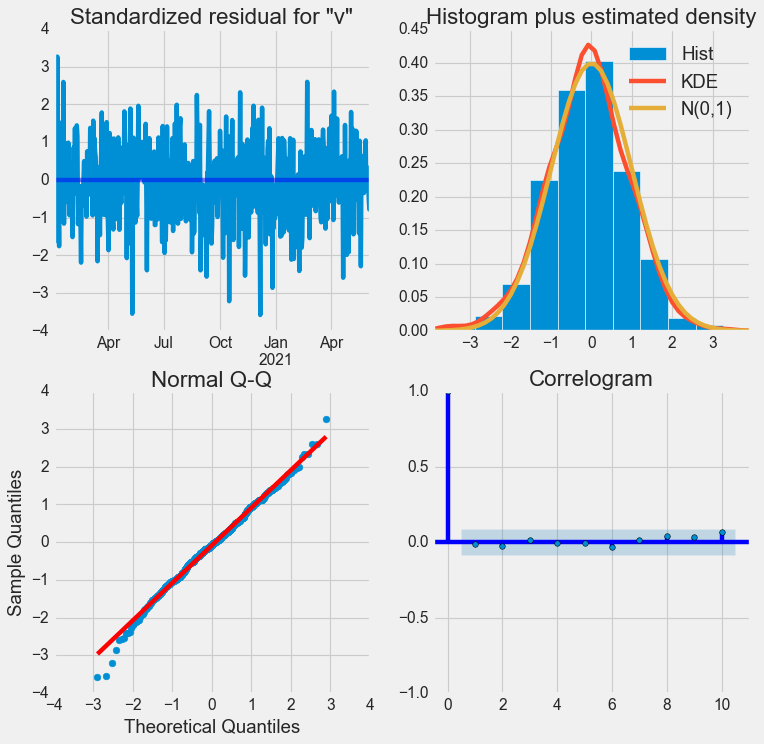

In [99]:
# Utilizaremos el diagnostico predeterminado para observar no solo el qqplot
#sino tambien el histograma con los density-plot para el ajuste visual de una normal.
# Además del Correlograma
plt.style.use('fivethirtyeight')
S2_m1.plot_diagnostics(figsize=(10, 10))
plt.show()

Verificamos los residuales con sus correlaciones, por medio de un test estadístico:

In [159]:
stats.acorr_ljungbox(S2_m1.resid, lags=10)

,lb_stat,lb_pvalue
1,0.122619,0.726211
2,0.425716,0.808271
3,0.483301,0.922544
4,0.503890,0.973121
5,0.521026,0.991333
6,0.963940,0.986942
7,0.999804,0.994832
8,1.918770,0.983402
9,2.569351,0.978960
10,5.329654,0.868098


Dado que el p-valor > $\alpha = 0.05$, no rechazamos la hipotesís nula por lo que concluimos que los residuales no estan correlacionados entre ellos para un tamaño de 10 rezagos.

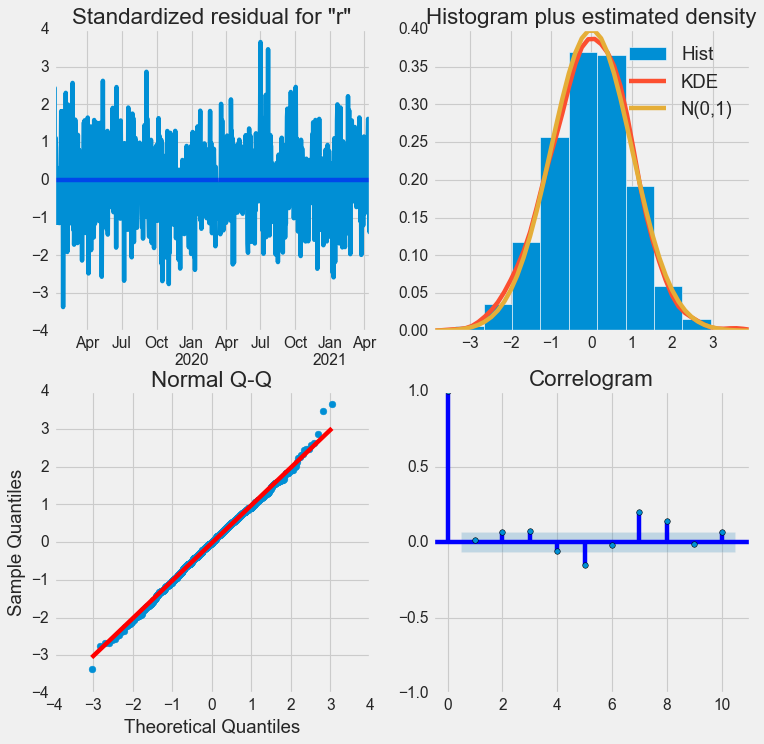

In [100]:
plt.style.use('fivethirtyeight')
ax = S3_m21.plot_diagnostics(figsize=(10, 10))
plt.show()

### Resultados:

Podemos Mirar varias cosas (Para las dos series 2 & 3):

1. Los residuales tienen visualmente varianza y media constante.


2. Se ajustan bien a una distribución normal por medio del histograma plus y el qqplot donde el ajuste es lo suficientemente bueno.

Para verificar que los residuales no esten correlacionadas verificamos con la prueba de Ljung-Box, además la prueba visual nos da un indicio de que esta no sera significativa.

In [160]:
stats.acorr_ljungbox(S3_m21.resid, lags=10)

,lb_stat,lb_pvalue
1,0.244643,6.208723e-01
2,4.537918,1.034198e-01
3,9.863468,1.976308e-02
4,12.533120,1.379737e-02
5,31.491984,7.488632e-06
6,31.770662,1.805503e-05
7,66.221782,8.540539e-12
8,81.698480,2.223653e-14
9,81.804158,7.075220e-14
10,85.541096,4.082292e-14


Como podemos ver las correlaciones existen entre los residuales, por lo cual, decidimos tomar otros modelos.

Ajustaremos un modelo más dependiente de los ruidos, es decir, ARIMA(0,1,4)

In [169]:
S3_mf = ARIMA(df3, order=(0,1,4)).fit()

In [170]:
S3_mf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               registro   No. Observations:                  837
Model:                 ARIMA(0, 1, 4)   Log Likelihood               -1177.357
Date:                Tue, 04 Oct 2022   AIC                           2364.714
Time:                        15:35:36   BIC                           2388.357
Sample:                    01-01-2019   HQIC                          2373.778
                         - 04-16-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.9389      0.029     32.284      0.000       0.882       0.996
ma.L2          0.7391      0.020     36.599      0.000       0.700       0.779
ma.L3          1.1171      0.020     55.331      0.000       1.077       1.157
ma.L4          0.5462      0.028     19.465      0.000       0.491       0.601
sigma2         0.9723      0.045     21.556      0.000       0.884       1.061
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 5.57
Prob(Q):                              0.98   Prob(JB):                         0.06
Heteroskedasticity (H):               0.88   Skew:                             0.14
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Podemos ver que los parametros estimados son significativos, por lo cual decimos que el modelo es:

$\theta(B) = 0.9389*B+ 0.7391*B^2 + 1.1171*B^3 + 0.5462*B^4$

In [166]:
# Aplicamos el de shapiro, dado de que el de jareq Bera no dio significativo:
ss.shapiro(S3_mf.resid)

ShapiroResult(statistic=0.9967597723007202, pvalue=0.087102010846138)

In [171]:
# Ahora miramos los test de no autocorrelación de los datos:
stats.acorr_ljungbox(S3_mf.resid, lags=10)

,lb_stat,lb_pvalue
1,0.021156,0.884354
2,0.717258,0.698633
3,0.999821,0.801295
4,1.594775,0.809731
5,2.331047,0.801696
6,4.356668,0.628529
7,5.431311,0.607481
8,5.443965,0.709240
9,5.479163,0.790700
10,6.717027,0.751862


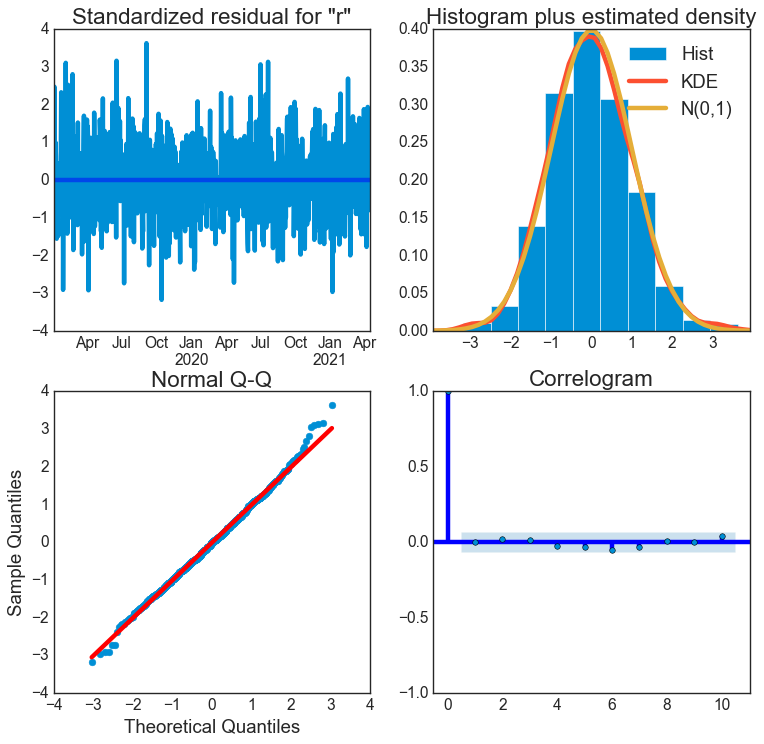

In [168]:
# Diagnosticos de los residuales:
S3_mf.plot_diagnostics(figsize=(10, 10))
plt.show()

Podemos ver que los datos se distribuyen normal de manera visual y con el test especifico, además el correlograma con su respectivo test nos demostraron que los datos cumple con la cualidad de ser NO correlacionados hasta el lag = 10.

Por ultimo y no menos importante vemos que la media y la varianza son constante para los residuales.

#### Test de Jarque-Bera

In [103]:
jb3 = ss.jarque_bera(S3_m21.resid)
display(Math("Test \ Jarque-Bera \ TS-3"))
display(Math("Valor \ P = "+ str(round(jb3.pvalue,3))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Solo podemos estadísticamente con una confianza del 95% decir que se ajustan los datos a la distribución normal los de la serie 2.

De esta manera nuestra serie 3 cumple con el supuesto de normalidad por medio del test de Jarque-Bera.

Para la Serie N°2, tenemos el test de  shapiro donde nos muestra que los residuales si se distribuyen normal de manera tal que los residuales de las dos serie cumplen con ese supuesto.

## Pregunta 8:

Si todo lo anterior se cumple entonces puede realizar pronósticos con el "mejor" modelo ajustado para los 5 valores futuros. Saque conclusiones argumentando cada una

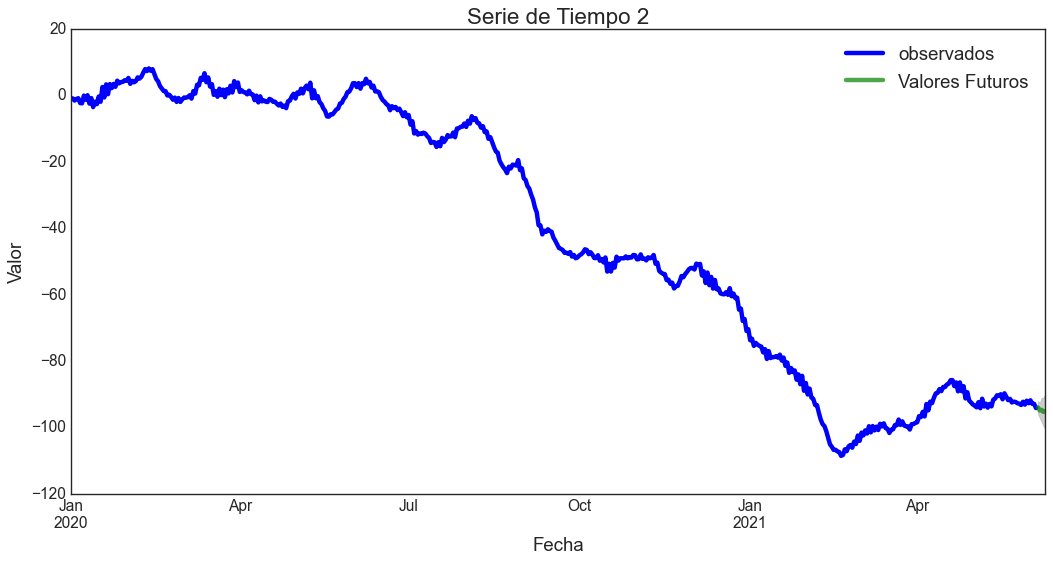

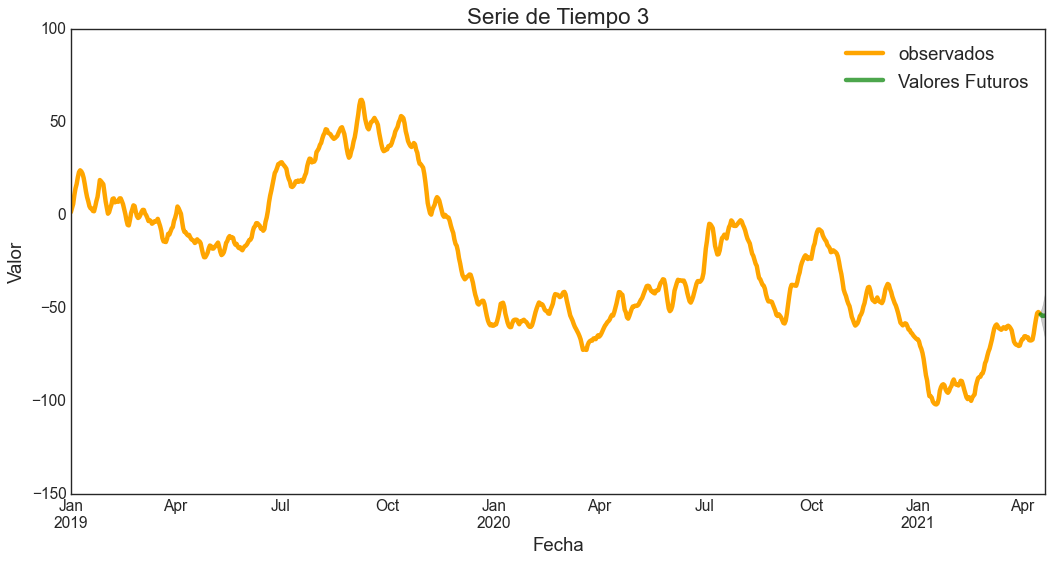

In [176]:
plt.style.use('seaborn-white')

####### Serie 2 #######

pred2 = S2_m1.get_forecast(5,dynamic=False)
pred2_ci = pred2.conf_int(alpha=0.05)

ax = df22['value'].plot(label='observados', color="blue")
pred2.predicted_mean.plot(ax=ax, label='Valores Futuros', alpha=.7, figsize=(14, 7), color="green")
ax.fill_between(pred2_ci.index,
                pred2_ci.iloc[:, 0],
                pred2_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_title('Serie de Tiempo 2')
ax.set_xlabel('Fecha')
ax.set_ylabel('Valor')
plt.legend()
plt.show()

####### Serie 3 #######

pred3 = S3_mf.get_forecast(5,dynamic=False)
pred3_ci = pred3.conf_int(alpha=0.05)

ax = df3['registro'].plot(label='observados', color="orange")
pred3.predicted_mean.plot(ax=ax, label='Valores Futuros', alpha=.7, figsize=(14, 7), color="green")
ax.fill_between(pred3_ci.index,
                pred3_ci.iloc[:, 0],
                pred3_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_title('Serie de Tiempo 3')
ax.set_xlabel('Fecha')
ax.set_ylabel('Valor')
plt.legend()
plt.show()

Vemos que en las dos series de tiempo que estos valores estimados tienen tendencia a decrecer ya que las series en varios valores anteriores venian con un decaimiento considerable notorio.

Como podemos ver la sombra representa el intervalo de confianza del 95%, con su respectivo valor futuro, además de mostrarnos los valores observados de color azul.

Podemos notar como el intervalo se expande a medida de se predicen valores futuros más lejanos al ultimo valor observado.